#Problem Statement

Using the MNIST dataset, build a classification model to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively. You have to use DNN and CNN with different loss functions as well as different optimization methods. Compare your results, and then select the best classification model for this datase

#Dataset Summery

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It stands for "Modified National Institute of Standards and Technology" and consists of a large collection of handwritten digits. The dataset serves as a standard benchmark for training and evaluating various machine learning algorithms, particularly those related to image recognition and classification tasks.


**Here are some key characteristics and details about the MNIST dataset:**

**Images:** The MNIST dataset contains grayscale images of handwritten digits, each in a 28x28 pixel format. Each pixel value represents the darkness of the pixel, with higher values indicating darker regions

**Labels:** Each image in the dataset is associated with a label that indicates the digit it represents. The labels range from 0 to 9, covering all ten digits.

**Size:** The dataset is divided into two main parts: a training set and a testing set. The training set contains 60,000 images, and the testing set contains 10,000 images.

**Variability:** The dataset includes a diverse range of handwriting styles, making it suitable for testing the generalization ability of machine learning algorithms.

#Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D


Flatten: this layer is used to faltten the input data.it reshapes the input tensor into a 1D Vector.it is used to pass data to a fully connected neural network.

**Dense:** it is used to connect all neurons feom the previous layer to all neurons in the current layer.

**Conv 2D:** this layer is used to add 2D convolutional layer to the neural network.it is used to process grid-like data, for instance image data.

**Maxpooling 2D:** it performs a downsampling operatation that reduces the spatial dimention of the input data whilw retaining important features.usually it is used in CNN.

#Load and Preprocess the Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


it splits the MNIST dataset into training and testing sets.(/255)This operation divides each pixel value by 255.0. The purpose of this division is to scale the pixel values to a range between 0 and 1. The original pixel values are integers between 0 and 255 (grayscale images), and dividing by 255.0 scales them to a floating-point value between 0 and 1.

#Build and Train DNN Model with Different Loss and Optimizer

In [ ]:
dnn_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

dnn_history = dnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2562 - accuracy: 0.9261 - val_loss: 0.1343 - val_accuracy: 0.9591
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1120 - accuracy: 0.9674 - val_loss: 0.0938 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0767 - accuracy: 0.9764 - val_loss: 0.0767 - val_accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9825 - val_loss: 0.0829 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0446 - accuracy: 0.9860 - val_loss: 0.0738 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0350 - accuracy: 0.9891 - val_loss: 0.0799 - val_accuracy: 0.9750
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0787 - val_accura

# Results for the DNN model over the 10 epochs

**Loss Decrease:** The "loss" value decreases significantly with each epoch, for both training and validation. This suggests that the model is effectively learning the features of the data and is gradually reducing the difference between its predicted labels and the true labels.

**Training Accuracy:** The "accuracy" value for the training data increases steadily with each epoch. This indicates that the model is becoming more accurate in predicting the correct labels for the training images. The training accuracy reaches a high value of around 99.48% by the last epoch.

**Validation Accuracy:** The "val_accuracy" value, representing the accuracy on the validation data, also increases with each epoch. This indicates that the model is generalizing well to new, unseen data. The validation accuracy reaches around 97.83% by the last epoch.

**Overfitting:** The validation accuracy consistently lags behind the training accuracy, but the gap is not excessively large. This suggests that the model is not overfitting significantly and is still able to generalize well to the validation data.

**Final Performance:** The model achieves a relatively high accuracy of around 97.83% on the validation set after 10 epochs. While this accuracy is slightly lower than the training accuracy, it is still a good performance for classifying handwritten digits.

**Steady Progress:** Both the training and validation curves show relatively smooth and steady progress, which indicates stable learning throughout the training process.

Overall, the training process demonstrates that the model is learning effectively and is capable of classifying handwritten digits with high accuracy

#Build and Train CNN Model with Different Loss and Optimizer

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1484 - accuracy: 0.9557 - val_loss: 0.0642 - val_accuracy: 0.9783
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0494 - val_accuracy: 0.9840
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0398 - val_accuracy: 0.9870
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0532 - val_accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0524 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0519 - val_accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0567 -

# Results for the CNN model over the 10 epochs

**Loss Decrease:** The "loss" value represents the difference between the predicted labels and the true labels. In each epoch, both the training and validation loss decrease significantly. This indicates that the model is effectively learning from the data and reducing its prediction errors.

**Training Accuracy:** The "accuracy" value for the training data steadily increases with each epoch. This means that the model is becoming more accurate in predicting the correct labels for the training images. The training accuracy reaches a high value of around 99.84% by the last epoch.

**Validation Accuracy:** The "val_accuracy" value represents the accuracy of the model's predictions on the validation data. It also increases with each epoch, indicating that the model is generalizing well to new, unseen data. The validation accuracy reaches around 98.73% by the last epoch.

**Overfitting:** Initially, the training accuracy increases more quickly than the validation accuracy, which is a common behavior. However, as the number of epochs increases, the gap between training and validation accuracy narrows. This suggests that the model is not overfitting and is generalizing well.

**Final Performance:** The model achieves a high accuracy of around 98.73% on the validation set after 10 epochs. This indicates that the model has successfully learned to recognize and classify handwritten digits.

**Stability:** The relatively steady increase in both training and validation accuracy over epochs suggests that the learning rate and model architecture are well-suited for the dataset. The model converges to a good solution without any drastic fluctuations.

Overall, the training process shows that the model is learning and generalizing effectively, with a high accuracy on both the training and validation sets. This suggests that the model is well-suited for classifying handwritten digits using the MNIST dataset.

#Model Evaluation

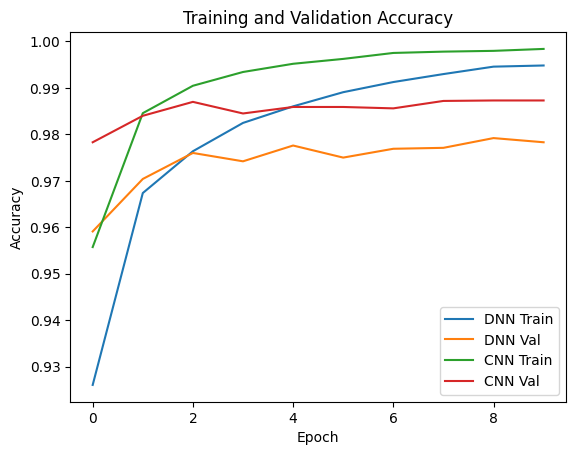

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dnn_history.history['accuracy'], label='DNN Train')
plt.plot(dnn_history.history['val_accuracy'], label='DNN Val')
plt.plot(cnn_history.history['accuracy'], label='CNN Train')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


The model with heigher validation accuracy is generally prefered as the better performing model for unseen dataset.Here, From this plot we see that the accuray of the CNN models validation data is greater than the DNN model validation data.therefore we may conclude by saying that CNN is the best classification model for this dataset.